In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
matplotlib.rcParams["xtick.labelsize"] = 18
matplotlib.rcParams["ytick.labelsize"] = 18
# matplotlib.rcParams["image.cmap"] = "Purples"
matplotlib.rcParams["image.cmap"] = "inferno"
matplotlib.rcParams["axes.titlesize"] = 18
matplotlib.rcParams["axes.labelsize"] = 18
import matplotlib.pyplot as plt
import scipy.linalg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import TLS
import drive
import floquet
import scattering_periodic_TLS

In [2]:
gamma = 1.0
numTimeSteps = 1001
# inpFreq = np.linspace(-15*gamma, 15*gamma, 1001)
ampFast = 5.0*gamma
freqFast = 10.0*gamma
periodFast = 2.0*np.pi/freqFast
numPeriodFast = 400.0
inpFreqFast = np.linspace(0, 1000.0/(numPeriodFast*periodFast), 1001) - 1000.0/(numPeriodFast*periodFast)/2.0

modulationFast = drive.sinDrive(0.0, ampFast, 0.0, freqFast)
tlsObjFast = TLS.modulatedTLS(0.0, gamma, modulationFast)
floquetObjFast = floquet.floquetEigenSolver(tlsObjFast, tlsObjFast.period, 1001, numPeriodFast)
gFuncFreqDomFast = scattering_periodic_TLS.singlePhotonGFunc(floquetObjFast)


ampMed = 5.0*gamma
freqMed = 2.5*gamma
periodMed = 2.0*np.pi/freqMed
numPeriodMed = 100.0
inpFreqMed = np.linspace(0, 1000.0/(numPeriodMed*periodMed), 1001) - 1000.0/(numPeriodMed*periodMed)/2.0

modulationMed = drive.sinDrive(0.0, ampMed, 0.0, freqMed)
tlsObjMed = TLS.modulatedTLS(0.0, gamma, modulationMed)
floquetObjMed = floquet.floquetEigenSolver(tlsObjMed, tlsObjMed.period, 1001, numPeriodMed)
gFuncFreqDomMed = scattering_periodic_TLS.singlePhotonGFunc(floquetObjMed)


ampSlow = 5.0*gamma
freqSlow = 0.25*gamma
periodSlow = 2.0*np.pi/freqSlow
numPeriodSlow = 10.0
inpFreqSlow = np.linspace(0, 1000.0/(numPeriodSlow*periodSlow), 1001) - 1000.0/(numPeriodSlow*periodSlow)/2.0

modulationSlow = drive.sinDrive(0.0, ampSlow, 0.0, freqSlow)
tlsObjSlow = TLS.modulatedTLS(0.0, gamma, modulationSlow)
floquetObjSlow = floquet.floquetEigenSolver(tlsObjSlow, tlsObjSlow.period, 1001, numPeriodSlow)
gFuncFreqDomSlow = scattering_periodic_TLS.singlePhotonGFunc(floquetObjSlow)


ampUnMod = 0.0*gamma
freqUnMod = 10.0*gamma
periodUnMod = 2.0*np.pi/freqUnMod
numPeriodUnMod = 400.0
inpFreqUnMod = np.linspace(0, 1000.0/(numPeriodUnMod*periodUnMod), 1001) - 1000.0/(numPeriodUnMod*periodUnMod)/2.0

modulationUnMod = drive.sinDrive(0.0, ampUnMod, 0.0, freqUnMod)
tlsObjUnMod = TLS.modulatedTLS(0.0, gamma, modulationUnMod)
floquetObjUnMod = floquet.floquetEigenSolver(tlsObjUnMod, tlsObjUnMod.period, 1001, numPeriodUnMod)
gFuncFreqDomUnMod = scattering_periodic_TLS.singlePhotonGFunc(floquetObjUnMod)

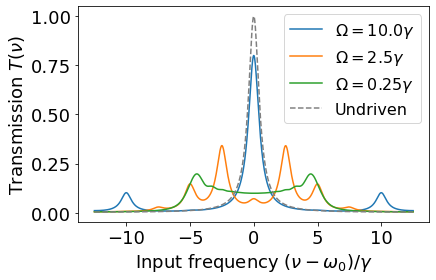

In [3]:
normFactor = (np.sum(np.abs(gFuncFreqDomUnMod)**2, axis=1))[500]

#plt.figure(figsize=(8.5, 6))
plt.figure()
#plt.subplot(1, 3, 1)
plt.plot(2*np.pi*inpFreqFast, np.sum(np.abs(gFuncFreqDomFast)**2/normFactor, axis=1), label="$\Omega=10.0\gamma$")
#plt.subplot(1, 3, 2)
plt.plot(2*np.pi*inpFreqMed, np.sum(np.abs(gFuncFreqDomMed)**2/normFactor, axis=1), label="$\Omega=2.5\gamma$")
#plt.subplot(1, 3, 3)
plt.plot(2*np.pi*inpFreqSlow, np.sum(np.abs(gFuncFreqDomSlow)**2/normFactor, axis=1), label="$\Omega=0.25\gamma$")

plt.plot(2*np.pi*inpFreqUnMod, np.sum(np.abs(gFuncFreqDomUnMod)**2/normFactor, axis=1), linestyle='--', color='grey', label="Undriven")
plt.legend(fontsize=16, loc=1)
plt.xlabel("Input frequency $(\\nu-\\omega_0)/\\gamma$")
plt.ylabel("Transmission $T(\\nu)$")
plt.tight_layout()
plt.savefig("tranPeriod.pdf")

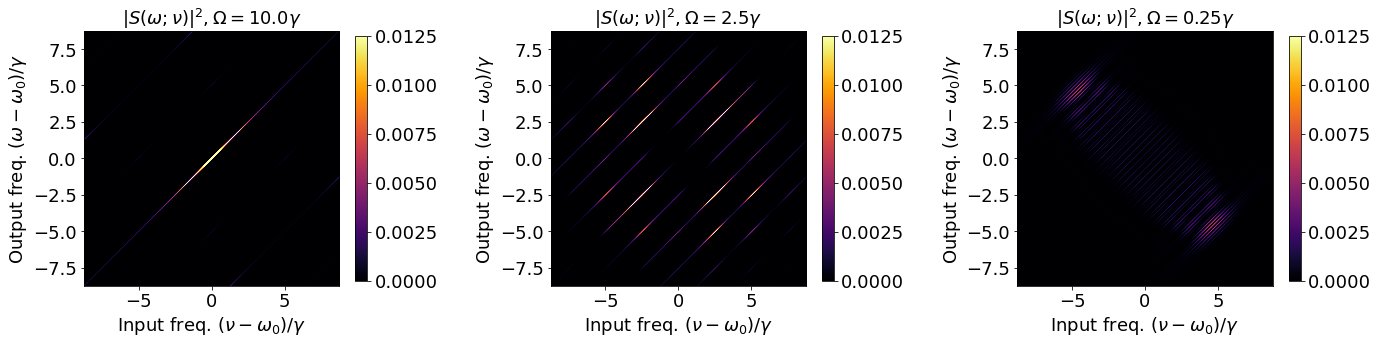

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
im = plt.imshow((np.abs(gFuncFreqDomFast)**2/normFactor)[150:850, 150:850], aspect=1, origin="lower",
          extent=[2*np.pi*inpFreqFast[150], 2*np.pi*inpFreqFast[850],
                   2*np.pi*inpFreqFast[150], 2*np.pi*inpFreqFast[850]])
plt.xlabel("Input freq. $(\\nu-\\omega_0)/\\gamma$")
plt.ylabel("Output freq. $(\\omega-\\omega_0)/\\gamma$")
plt.title("$|S(\\omega;\\nu)|^2,\\Omega=10.0\\gamma$")
plt.clim(0.0, 0.0125)
plt.colorbar(shrink=0.18)

plt.subplot(1, 3, 2)
im = plt.imshow((np.abs(gFuncFreqDomMed)**2/normFactor)[150:850, 150:850], aspect=1, origin="lower",
          extent=[2*np.pi*inpFreqMed[150], 2*np.pi*inpFreqMed[850],
                   2*np.pi*inpFreqMed[150], 2*np.pi*inpFreqMed[850]])
plt.xlabel("Input freq. $(\\nu-\\omega_0)/\\gamma$")
plt.ylabel("Output freq. $(\\omega-\\omega_0)/\\gamma$")
plt.title("$|S(\\omega;\\nu)|^2,\\Omega=2.5\\gamma$")
plt.clim(0.0, 0.0125)
plt.colorbar(shrink=0.18)

plt.subplot(1, 3, 3)
im = plt.imshow((np.abs(gFuncFreqDomSlow)**2/normFactor)[150:850, 150:850], aspect=1, origin="lower",
          extent=[2*np.pi*inpFreqSlow[150], 2*np.pi*inpFreqSlow[850],
                   2*np.pi*inpFreqSlow[150], 2*np.pi*inpFreqSlow[850]])
plt.xlabel("Input freq. $(\\nu-\\omega_0)/\\gamma$")
plt.ylabel("Output freq. $(\\omega-\\omega_0)/\\gamma$")
plt.title("$|S(\\omega;\\nu)|^2,\\Omega=0.25\\gamma$")
plt.clim(0.0, 0.0125)
plt.colorbar(im, shrink=0.18)

plt.tight_layout(pad=4.0)
plt.savefig("sMatEle.eps")

In [42]:
# Two- and four-frequency design
gamma = 98
basicFreq = 1500
means_2f = np.array([0.0, 0.0, 0.0])
amps_2f = np.array([2910, 0.0, 2250])
phases_2f = np.array([0.0, 0.0, 0.0])
freqs_2f = basicFreq*np.array([1, 2, 3])
period_2f = 2.0*np.pi/basicFreq
numPeriod_2f = 75
inpFreq_2f = np.linspace(0, 1000.0/(numPeriod_2f*period_2f), 1001) - 1000.0/(numPeriod_2f*period_2f)/2.0

modulation_2f = drive.multiSinDrive(means_2f, amps_2f, phases_2f, freqs_2f)
tlsObj_2f = TLS.modulatedTLS(0.0, gamma, modulation_2f)
floquetObj_2f = floquet.floquetEigenSolver(tlsObj_2f, period_2f, 1001, numPeriod_2f)
gFuncFreqDom_2f = scattering_periodic_TLS.singlePhotonGFunc(floquetObj_2f)


# means_2f = np.array([0.0, 0.0, 0.0])
# amps_2f = np.array([20.0, 0.0, 0.0])
# phases_2f = np.array([0.0, 0.0, 0.0])
# freqs_2f = basicFreq*np.array([1, 2, 3])
# period_2f = 2.0*np.pi/basicFreq
# numPeriod_2f = 100.0
# inpFreq_2f = np.linspace(0, 1000.0/(numPeriod_2f*period_2f), 1001) - 1000.0/(numPeriod_2f*period_2f)/2.0

# modulation_2f = drive.multiSinDrive(means_2f, amps_2f, phases_2f, freqs_2f)
# tlsObj_2f = TLS.modulatedTLS(0.0, gamma, modulation_2f)
# floquetObj_2f = floquet.floquetEigenSolver(tlsObj_2f, tlsObj_2f.period, 1001, numPeriod_2f)
# gFuncFreqDom_2f_1 = scattering_periodic_TLS.singlePhotonGFunc(floquetObj_2f)


# means_2f = np.array([0.0, 0.0, 0.0])
# amps_2f = np.array([30.0, 0.0, 0.0])
# phases_2f = np.array([0.0, 0.0, 0.0])
# freqs_2f = basicFreq*np.array([1, 2, 3])
# period_2f = 2.0*np.pi/basicFreq
# numPeriod_2f = 100.0
# inpFreq_2f = np.linspace(0, 1000.0/(numPeriod_2f*period_2f), 1001) - 1000.0/(numPeriod_2f*period_2f)/2.0

# modulation_2f = drive.multiSinDrive(means_2f, amps_2f, phases_2f, freqs_2f)
# tlsObj_2f = TLS.modulatedTLS(0.0, gamma, modulation_2f)
# floquetObj_2f = floquet.floquetEigenSolver(tlsObj_2f, tlsObj_2f.period, 1001, numPeriod_2f)
# gFuncFreqDom_2f_2 = scattering_periodic_TLS.singlePhotonGFunc(floquetObj_2f)


amps_2f_norm = np.array([0.0, 0.0, 0.0])

modulation_2f_norm = drive.multiSinDrive(means_2f, amps_2f_norm, phases_2f, freqs_2f)
tlsObj_2f_norm = TLS.modulatedTLS(0.0, gamma, modulation_2f_norm)
floquetObj_2f_norm = floquet.floquetEigenSolver(tlsObj_2f_norm, period_2f, 1001, numPeriod_2f)
gFuncFreqDom_2f_norm = scattering_periodic_TLS.singlePhotonGFunc(floquetObj_2f_norm)
normFactor_2f = (np.sum(np.abs(gFuncFreqDom_2f_norm)**2, axis=1))[500]

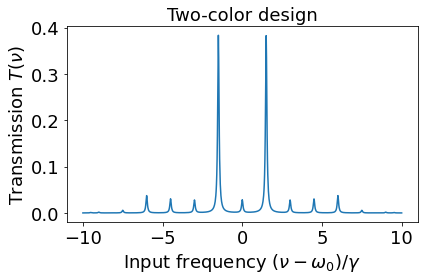

In [45]:
plt.figure()
plt.plot(2*np.pi*inpFreq_2f/1000, np.sum(np.abs(gFuncFreqDom_2f)**2/normFactor_2f, axis=1))
# plt.plot(2*np.pi*inpFreq_2f, np.sum(np.abs(gFuncFreqDom_2f_1)**2/normFactor, axis=1), label="$A=20\gamma$")
# plt.plot(2*np.pi*inpFreq_2f, np.sum(np.abs(gFuncFreqDom_2f_2)**2/normFactor, axis=1), label="$A=30\gamma$")
# plt.legend(fontsize=16, loc=1)
plt.xlabel("Input frequency $(\\nu-\\omega_0)/\\gamma$")
plt.ylabel("Transmission $T(\\nu)$")
plt.title("Two-color design")
plt.tight_layout()
plt.savefig("twoColor.pdf")

In [35]:
means_4f = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
basicFreq = 1200
amps_4f = np.array([2360.0, 2110.0, 2220.0, 2020.0, 2250.0])
phases_4f = np.array([np.pi/6, -np.pi/6, np.pi/2, -5*np.pi/6, 5*np.pi/6])
freqs_4f = basicFreq*np.array([1, 2, 3, 4, 5])
period_4f = 2.0*np.pi/basicFreq
numPeriod_4f = 50.0
inpFreq_4f = np.linspace(0, 1000.0/(numPeriod_4f*period_4f), 1001) - 1000.0/(numPeriod_4f*period_4f)/2.0

modulation_4f = drive.multiSinDrive(means_4f, amps_4f, phases_4f, freqs_4f)
tlsObj_4f = TLS.modulatedTLS(0.0, gamma, modulation_4f)
floquetObj_4f = floquet.floquetEigenSolver(tlsObj_4f, tlsObj_4f.period, 1001, numPeriod_4f)
gFuncFreqDom_4f = scattering_periodic_TLS.singlePhotonGFunc(floquetObj_4f)


# calculate the normalization factor
amps_4f_norm = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

modulation_4f_norm = drive.multiSinDrive(means_4f, amps_4f_norm, phases_4f, freqs_4f)
tlsObj_4f_norm = TLS.modulatedTLS(0.0, gamma, modulation_4f_norm)
floquetObj_4f_norm = floquet.floquetEigenSolver(tlsObj_4f_norm, period_4f, 1001, numPeriod_4f)
gFuncFreqDom_4f_norm = scattering_periodic_TLS.singlePhotonGFunc(floquetObj_4f_norm)
normFactor_4f = (np.sum(np.abs(gFuncFreqDom_4f_norm)**2, axis=1))[500]

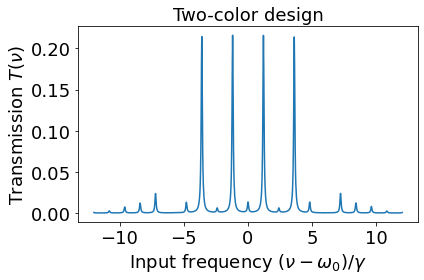

In [44]:
plt.figure()
plt.plot(2*np.pi*inpFreq_4f/1000, np.sum(np.abs(gFuncFreqDom_4f)**2/normFactor_4f, axis=1))
plt.xlabel("Input frequency $(\\nu-\\omega_0)/\\gamma$")
plt.ylabel("Transmission $T(\\nu)$")
plt.title("Four-color design")
plt.tight_layout()
plt.savefig("fourColor.pdf")

In [248]:
normFactor

7.102364544884068e-11

In [56]:
gamma = 1.0
ampKerr = 3.0*gamma
freqKerr = 2.5*gamma
periodKerr = 2.0*np.pi/freqKerr
numPeriodKerr = 150.0
inpFreqKerr = np.linspace(0, 1000.0/(numPeriodKerr*periodKerr), 1001) - 1000.0/(numPeriodKerr*periodKerr)/2.0

modulationKerr = drive.sinDrive(0.0, ampKerr, 0.0, freqKerr)
tlsObjKerr = TLS.modulatedTLS(0.0, gamma, modulationKerr)
floquetObjKerr = floquet.floquetEigenSolver(tlsObjKerr, periodKerr, 1001, numPeriodKerr)
gFuncFreqDomKerr = scattering_periodic_TLS.singlePhotonGFunc(floquetObjKerr)


freqKerr2 = 0.05*gamma
periodKerr2 = 2.0*np.pi/freqKerr2
numPeriodKerr2 = 3.0
inpFreqKerr2 = np.linspace(0, 1000.0/(numPeriodKerr2*periodKerr2), 1001) - 1000.0/(numPeriodKerr2*periodKerr2)/2.0

modulationKerr2 = drive.sinDrive(0.0, ampKerr, 0.0, freqKerr2)
tlsObjKerr2 = TLS.modulatedTLS(0.0, gamma, modulationKerr2)
floquetObjKerr2 = floquet.floquetEigenSolver(tlsObjKerr2, periodKerr2, 1001, numPeriodKerr2)
gFuncFreqDomKerr2 = scattering_periodic_TLS.singlePhotonGFunc(floquetObjKerr2)


ampKerrNorm = 0.0*gamma

modulationKerrNorm = drive.sinDrive(0.0, ampKerrNorm, 0.0, freqKerr)
tlsObjKerrNorm = TLS.modulatedTLS(0.0, gamma, modulationKerrNorm)
floquetObjKerrNorm = floquet.floquetEigenSolver(tlsObjKerrNorm, periodKerr, 1001, numPeriodKerr)
gFuncFreqDomKerrNorm = scattering_periodic_TLS.singlePhotonGFunc(floquetObjKerrNorm)

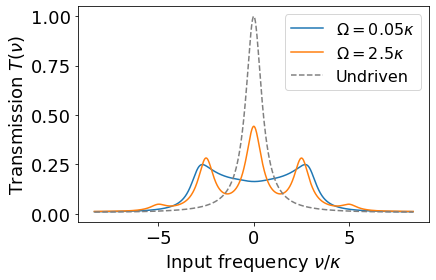

In [65]:
normFactorKerr = (np.sum(np.abs(gFuncFreqDomKerrNorm)**2, axis=1))[500]

plt.figure()
plt.plot(2*np.pi*inpFreqKerr2, np.sum(np.abs(gFuncFreqDomKerr2)**2/normFactorKerr, axis=1), label="$\Omega=0.05\kappa$")
plt.plot(2*np.pi*inpFreqKerr, np.sum(np.abs(gFuncFreqDomKerr)**2/normFactorKerr, axis=1), label="$\Omega=2.5\kappa$")

plt.plot(2*np.pi*inpFreqKerr2, np.sum(np.abs(gFuncFreqDomKerrNorm)**2/normFactorKerr, axis=1), linestyle='--', color='grey', label="Undriven")
plt.legend(fontsize=16, loc=1)
plt.xlabel("Input frequency $\\nu/\\kappa$")
plt.ylabel("Transmission $T(\\nu)$")
plt.tight_layout()
plt.savefig("kerr.pdf")